#### House Price Prediction using Linear Regression

**Importing necessary libraries**

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None

**Loading train data**

In [33]:
train_df = pd.read_csv('Dataset/train.csv')

In [34]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
train_df.shape

(1460, 81)

In [36]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**Loading test data**

In [37]:
test_df = pd.read_csv('Dataset/test.csv')

In [38]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [39]:
test_df.shape

(1459, 80)

**Feature Engineering**

In [40]:
train_df = train_df[['LotArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'SalePrice']]
train_df.head()

,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,8450,1,0,2,1,3,208500
1,9600,0,1,2,0,3,181500
2,11250,1,0,2,1,3,223500
3,9550,1,0,1,0,3,140000
4,14260,1,0,2,1,4,250000


In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   BsmtFullBath  1460 non-null   int64
 2   BsmtHalfBath  1460 non-null   int64
 3   FullBath      1460 non-null   int64
 4   HalfBath      1460 non-null   int64
 5   BedroomAbvGr  1460 non-null   int64
 6   SalePrice     1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


In [42]:
train_df.describe()

,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,0.425342,0.057534,1.565068,0.382877,2.866438,180921.195890
std,9981.264932,0.518911,0.238753,0.550916,0.502885,0.815778,79442.502883
min,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,0.000000,0.000000,1.000000,0.000000,2.000000,129975.000000
50%,9478.500000,0.000000,0.000000,2.000000,0.000000,3.000000,163000.000000
75%,11601.500000,1.000000,0.000000,2.000000,1.000000,3.000000,214000.000000
max,215245.000000,3.000000,2.000000,3.000000,2.000000,8.000000,755000.000000


In [43]:
train_df['Bathroom'] = train_df.BsmtFullBath + train_df.BsmtHalfBath + train_df.FullBath + train_df.HalfBath
train_df.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis = 'columns', inplace = True)
train_df.rename(columns = {'LotArea': 'Area', 'BedroomAbvGr': 'Bedroom'}, inplace = True)
train_df.head()

,Area,Bedroom,SalePrice,Bathroom
0,8450,3,208500,4
1,9600,3,181500,3
2,11250,3,223500,4
3,9550,3,140000,2
4,14260,4,250000,4


In [44]:
train_df.skew()

Area         12.207688
Bedroom       0.211790
SalePrice     1.882876
Bathroom      0.271760
dtype: float64

<Axes: >

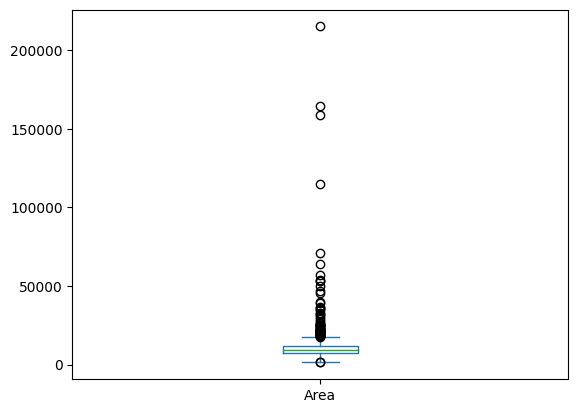

In [45]:
train_df.Area.plot(kind = 'box')

<Axes: >

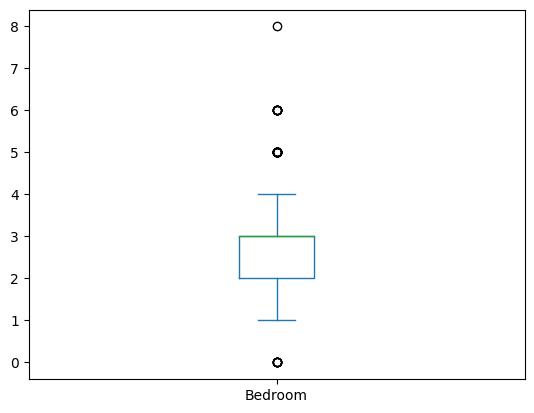

In [46]:
train_df.Bedroom.plot(kind = 'box')

<Axes: >

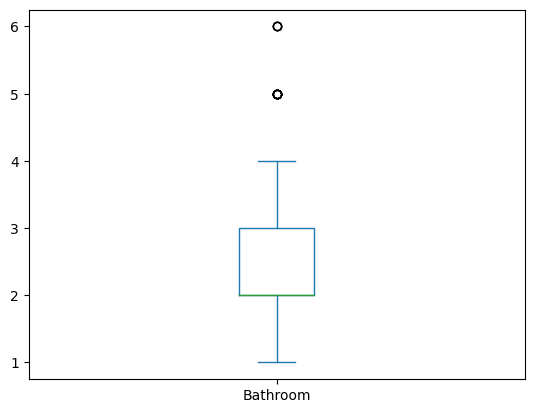

In [47]:
train_df.Bathroom.plot(kind = 'box')

In [48]:
train_df = train_df[(train_df.Area <= 20000) & (train_df.Bedroom >= 1) & (train_df.Bedroom <= 4) & (train_df.Bathroom <= 4)] 

In [49]:
train_df.skew()

Area         0.074400
Bedroom     -0.300741
SalePrice    1.495879
Bathroom     0.115701
dtype: float64

In [50]:
train_df.shape

(1371, 4)

**Train Test Split**

In [51]:
X_train = train_df[['Area', 'Bedroom', 'Bathroom']]
X_train.head()

,Area,Bedroom,Bathroom
0,8450,3,4
1,9600,3,3
2,11250,3,4
3,9550,3,2
4,14260,4,4


In [52]:
y_train = train_df.SalePrice
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [53]:
X_test = test_df[['LotArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']]
X_test.head()

,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
0,11622,0.0,0.0,1,0,2
1,14267,0.0,0.0,1,1,3
2,13830,0.0,0.0,2,1,3
3,9978,0.0,0.0,2,1,3
4,5005,0.0,0.0,2,0,2


In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1459 non-null   int64  
 1   BsmtFullBath  1457 non-null   float64
 2   BsmtHalfBath  1457 non-null   float64
 3   FullBath      1459 non-null   int64  
 4   HalfBath      1459 non-null   int64  
 5   BedroomAbvGr  1459 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 68.5 KB


In [55]:
X_test.dropna(inplace = True)

In [56]:
X_test['Bathroom'] = (X_test.BsmtFullBath + X_test.BsmtHalfBath + X_test.FullBath + X_test.HalfBath).astype(int)
X_test.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis = 'columns', inplace = True)
X_test.rename(columns = {'LotArea': 'Area', 'BedroomAbvGr': 'Bedroom'}, inplace = True)
X_test.head()

,Area,Bedroom,Bathroom
0,11622,2,1
1,14267,3,2
2,13830,3,3
3,9978,3,3
4,5005,2,2


**Scaling the columns**

In [57]:
scaler = StandardScaler()

In [58]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model Fitting**

In [59]:
model = LinearRegression()

In [60]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [61]:
model.score(X_train_scaled, y_train)

0.4764605888617909

**Prediction**

In [62]:
model.predict(X_test_scaled)

array([133193.56739111, 192338.46040016, 237348.61494404, ...,
       225085.47429932, 165476.68529248, 207839.97908999])